In [160]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
from IPython import display
import matplotlib
import matplotlib.pyplot as plt

from rllib.agent import QLearningAgent
from rllib.util import rollout_agent
from rllib.util.neural_networks import DeterministicNN
from rllib.dataset import ExperienceReplay, Observation
from rllib.exploration_strategies import EpsGreedy
from rllib.environment.systems import InvertedPendulum, CartPole
from rllib.environment import SystemEnvironment, GymEnvironment
import numpy as np 

import torch.nn.functional as func
import torch.optim  



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [162]:
ENVIRONMENT = 'CartPole-v0'
NUM_EPISODES = 30
TARGET_UPDATE = 4
MEMORY_MAX_SIZE = 10000
BATCH_SIZE = 128
GAMMA = 0.999
EPS_START = 0.9
EPS_END = 0.05
EPS_DECAY = 200
LAYERS = [32, 32]

environment = GymEnvironment(ENVIRONMENT)
exploration = EpsGreedy(EPS_START, EPS_END, EPS_DECAY) 

q_function = DeterministicNN(environment.dim_state, environment.num_action, layers=LAYERS)
q_target = DeterministicNN(environment.dim_state, environment.num_action, layers=LAYERS)
optimizer = torch.optim.Adam
criterion = func.smooth_l1_loss
memory = ExperienceReplay(max_len=MEMORY_MAX_SIZE)

hyper_params = {
    'target_update': TARGET_UPDATE,
    'batch_size': BATCH_SIZE, 
    'gamma': GAMMA
}

agent = QLearningAgent(q_function, q_target, exploration, criterion, optimizer, memory,
                 hyper_params
)


[0, 0, 12, 14, 10, 15, 13, 26, 9, 12, 15, 10, 11, 10, 10, 13, 14, 11, 14, 11, 12, 13, 11, 10, 11, 10, 10, 10, 12, 10, 12, 10]


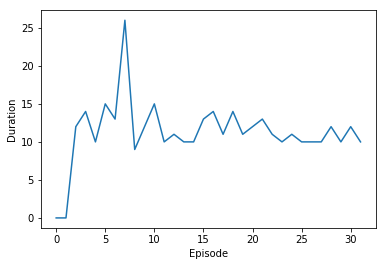

In [165]:
rollout_agent(environment, agent, num_episodes=NUM_EPISODES)
    # state = environment.reset()
    # done = False
    # t = 0
    # while not done:
    #     total_steps += 1
    #     t += 1
    #     action = q_function(torch.from_numpy(state).float()).argmax().item()
    #     eps = EPS_END + (EPS_START - EPS_END) * np.exp(-1. * total_steps / EPS_DECAY)
    # 
    #     if np.random.rand() < eps:
    #         action = np.random.choice(environment.num_action)
    #         
    #     next_state, reward, done, _ = environment.step(action) 
    #     memory.append(Observation(state=state, 
    #                               action=action, 
    #                               next_state=next_state,
    #                               reward=reward,
    #                               done=done
    #                               ))
    #     state = next_state
    #     
    #     if len(memory) > BATCH_SIZE:
    #         memory.shuffle()
    #         for (state_, action_, reward_, next_state_, done_) in data_loader:
    #             optimizer.zero_grad()
    #             
    #             predicted_value = GAMMA * q_function(state_.float()).gather(1, action_.unsqueeze(-1))
    #             predicted_value += reward_.float().unsqueeze(-1)
    #             
    #             next_state_value = q_target_function(next_state_.float()).max(dim=-1, keepdim=True)[0]
    #             next_state_value[done_] = 0
    #             
    #             loss = criterion(predicted_value, next_state_value)
    # 
    #             loss.backward()
    #             optimizer.step()
    #             break
    # 
    # if i_episode % TARGET_UPDATE == 0:
    #     q_target_function.load_state_dict(q_function.state_dict())           
    # episode_durations.append(t)
    
plt.figure(1)
plt.plot(agent._statistics['episode_steps'])
plt.xlabel('Episode')
plt.ylabel('Duration') 
plt.show()